In [26]:
%load_ext autoreload
%autoreload 2
import sys
import collections
import numpy as np

import textwrap
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams["figure.figsize"] = (6, 6)
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'
# todo for final version, but onlyw orks in local, not on scai AFAIK
plt.rcParams['font.serif'] = 'Times Roman'

SIZE = "large"
class ComplexRadar():
    """
    Create a complex radar chart with different scales for each variable
    Parameters
    ----------
    fig : figure object
        A matplotlib figure object to add the axes on
    variables : list
        A list of variables
    ranges : list
        A list of tuples (min, max) for each variable
    n_ring_levels: int, defaults to 5
        Number of ordinate or ring levels to draw
    show_scales: bool, defaults to True
        Indicates if we the ranges for each variable are plotted
    """
    def __init__(self, fig, variables, ranges, n_ring_levels=5, show_scales=True):
        # Calculate angles and create for each variable an axes
        # Consider here the trick with having the first axes element twice (len+1)
        angles = np.arange(0, 360, 360./len(variables))
        axes = [fig.add_axes([0.1,0.1,0.9,0.9], polar=True, label = "axes{}".format(i)) for i in range(len(variables)+1)]

        # Ensure clockwise rotation (first variable at the top N)
        for ax in axes:
            ax.set_theta_zero_location('N')
            ax.set_theta_direction(-1)
            ax.set_axisbelow(True)

        # Writing the ranges on each axes
        for i, ax in enumerate(axes):

            # Here we do the trick by repeating the first iteration
            j = 0 if (i==0 or i==1) else i-1
            ax.set_ylim(*ranges[j])
            # Set endpoint to True if you like to have values right before the last circle
            grid = np.linspace(*ranges[j], num=n_ring_levels,
                               endpoint=True)
            gridlabel = [
                "{}".format(round(x, 2 if (variables[j] == '$BLEU4$' and x == 0.4238) else 3))
                for x in grid
            ]
            gridlabel[0] = "" # remove values from the center
            lines, labels = ax.set_rgrids(grid, labels=gridlabel, angle=angles[j])

            ax.set_ylim(*ranges[j])
            ax.spines["polar"].set_visible(False)
            ax.grid(visible=False)

            if show_scales == False:
                ax.set_yticklabels([])

        # Set all axes except the first one unvisible
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)

        # Setting the attributes
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        self.ax1 = axes[1]
        self.plot_counter = 0

        # Draw (inner) circles and lines
        self.ax.yaxis.grid()
        self.ax.xaxis.grid()

        # Draw outer circle
        self.ax.spines['polar'].set_visible(True)

        # ax1 is the duplicate of axes[0] (self.ax)
        # Remove everything from ax1 except the plot itself
        self.ax1.axis('off')
        self.ax1.set_zorder(9)

        # Create the outer labels for each variable
        # print(angles)
        angles_fixed = [angles[0], angles[1]]
        angles_fixed.extend(angles[2:])
        print(angles_fixed)
        l, text = self.ax.set_thetagrids(
            angles_fixed, labels=variables,
            color="black")

        # Beautify them
        labels = [t.get_text() for t in self.ax.get_xticklabels()]
        labels = ['\n'.join(textwrap.wrap(l, 1,
                                          break_long_words=False)) for l in labels]
        self.ax.set_xticklabels(labels, size=SIZE)

        for t,a in zip(self.ax.get_xticklabels(),angles):
            if a == 0:
                t.set_ha('center')
            elif a > 0 and a < 180:
                t.set_ha('left')
            elif a == 180:
                t.set_ha('center')
            else:
                t.set_ha('right')

        self.ax.tick_params(axis='both', pad=10)


    def _scale_data(self, data, ranges):
        """Scales data[1:] to ranges[0]"""
        for d, (y1, y2) in zip(data[1:], ranges[1:]):
            assert (y1 <= d <= y2) or (y2 <= d <= y1)
        x1, x2 = ranges[0]
        d = data[0]
        sdata = [d]
        for d, (y1, y2) in zip(data[1:], ranges[1:]):
            sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)
        return sdata

    def plot(self, data, *args, **kwargs):
        """Plots a line"""
        sdata = self._scale_data(data, self.ranges)
        self.ax1.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kwargs)
        self.plot_counter = self.plot_counter+1

    def fill(self, data, *args, **kwargs):
        """Plots an area"""
        sdata = self._scale_data(data, self.ranges)
        self.ax1.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kwargs)

    def use_legend(self, *args, **kwargs):
        """Shows a legend"""
        self.ax1.legend(*args, **kwargs)

    def set_title(self, title, pad=25, **kwargs):
        """Set a title"""
        self.ax.set_title(title,pad=pad, **kwargs)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
d = {}

label = "bleu4"
d[label] = {
    'CIDEr': 1.3703,
    'Bleu_1': 0.8252,
    'Bleu_2': 0.6842,
    'Bleu_3': 0.5439,
    'Bleu_4': 0.4224,
    'ROUGE_L': 0.6072,
    'SPICE': 0.24,
    'METEOR': 0.3017,
    'lambda': 0.0,
    'lambdas': [1.0, 0.0]
}
label = "meteor"
d[label] = {
    'CIDEr': 1.3168,
    'Bleu_1': 0.7838,
    'Bleu_2': 0.6298,
    'Bleu_3': 0.4861,
    'Bleu_4': 0.3674,
    'ROUGE_L': 0.5994,
    'SPICE': 0.2532,
    'METEOR': 0.3117,
    'lambda': 0.0,
    'lambdas': [1.0, 0.0]
}
label = "cider"
d[label] = {
    'CIDEr': 1.3907,
    'Bleu_1': 0.8306,
    'Bleu_2': 0.6846,
    'Bleu_3': 0.5388,
    'Bleu_4': 0.4145,
    'ROUGE_L': 0.6048,
    'SPICE': 0.2421,
    'METEOR': 0.3026,
    'lambda': 0.0,
    'lambdas': [1.0, 0.0]
}
label = "rouge"
d[label] = [
    ('CIDEr', 1.3701), ('Bleu_1', 0.8234), ('Bleu_2', 0.682), ('Bleu_3', 0.54), ('Bleu_4', 0.4187),
    ('ROUGE_L', 0.61), ('SPICE', 0.2388), ('METEOR', 0.3011)
]
label = "cidere2e"
d[label] = [
    ('CIDEr', 1.3965), ('Bleu_1', 0.8321), ('Bleu_2', 0.6864), ('Bleu_3', 0.5408),
    ('Bleu_4', 0.4168), ('ROUGE_L', 0.6059), ('SPICE', 0.2428), ('METEOR', 0.3036), ("lambda", 1.0)
]
label = "bleu1"
d[label] = {
    'CIDEr': 1.3707,
    'Bleu_1': 0.8497,
    'Bleu_2': 0.6931,
    'Bleu_3': 0.538,
    'Bleu_4': 0.4086,
    'ROUGE_L': 0.6038,
    'SPICE': 0.2413,
    'METEOR': 0.299,
    'lambda': 1.0,
    'lambdas': [0.0, 1.0]
}

label = "multi"
d[label] = {
    "Bleu_1":
        0.8333,
    "Bleu_2":
        0.6872,
    "Bleu_3":
        0.5414,
    "Bleu_4":
        0.4171,
    "CIDEr":
        1.3855,
    "METEOR":
        0.3037,
    "ROUGE_L":
        0.6072,
    "SPICE":
        0.2422,
    "epoch":
        6.0,
    "path":
        "/gpfswork/rech/edr/utr15kn/dataplace/ExpansionNet_v2/github_ignore_material//saves/ftsciderbleu1bleu4rougemeteorbs18lr1e-5/checkpoint_2023-04-21-06:27:02_epoch5it6293bs18_cider,bleu1,bleu4,rouge,meteor_.pth",
    "reinforce":
        "cider,bleu1,bleu4,rouge,meteor",
    "step":
        37758
}

label = "bleu_rouge_meteor_bleu4_cidere2e"
d[label] = [('CIDEr', 1.3897), ('Bleu_1', 0.8364), ('Bleu_2', 0.6892), ('Bleu_3', 0.5432), ('Bleu_4', 0.4189), ('ROUGE_L', 0.6092), ('SPICE', 0.2447), ('METEOR', 0.3054), ('lambda', [0.2, 0.2, 0.2, 0.2, 0.2])]

l = {}
for key in d.keys():
    if isinstance(d[key], dict):
        l[key] = d[key]
    else:
        l[key] = {key: value for key, value in d[key]}


In [18]:
import matplotlib
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import StrMethodFormatter

def get_color_from_cmap(cmp, dict_colormaps):
    cmp = dict_colormaps.get(cmp, cmp)
    if isinstance(cmp, str) and cmp.startswith("fake_"):
        return cmp.split("_")[1]
    return cm.get_cmap(cmp)(0.5)


def create_colormaps():
    N = 256
    dict_colormaps = {}

    def create_cmp(r, g, b):
        np_array = np.ones((N, 4))
        np_array[:, 0] = np.linspace(r / 256, 1, N)
        np_array[:, 1] = np.linspace(g / 256, 1, N)
        np_array[:, 2] = np.linspace(b / 256, 1, N)
        return ListedColormap(np_array)

    dict_colormaps["Yellows"] = create_cmp(255, 232, 11)
    dict_colormaps["Light_Yellows"] = create_cmp(255, 232, 200)
    dict_colormaps["Dark_Blues"] = create_cmp(2, 2, 200)
    dict_colormaps["Blues_Greys"] = create_cmp(40, 60, 80)
    dict_colormaps["Blues_Greens"] = create_cmp(125, 150, 250)
    dict_colormaps["Reds_Greens"] = create_cmp(250, 150, 125)
    dict_colormaps["Dark_Greys"] = create_cmp(40, 60, 200)

    return dict_colormaps

In [19]:
dict_clean_labels = {
    "ROUGE_L": r"$ROUGE$",
    "Bleu_1": r"$BLEU1$",
    "Bleu_4": r"$BLEU4$",
    "METEOR": r"$METEOR$",
    "CIDEr": r"$CIDEr$"
}

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple']
markers = ['o', 'v', '^', '<', '>', '*', 's', 'p', 'h', 'H']

dict_colormaps = create_colormaps()
cmap_redpurpleblue = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", [
        get_color_from_cmap("Reds", dict_colormaps),
        get_color_from_cmap("Purples", dict_colormaps),
        get_color_from_cmap("Blues", dict_colormaps)
    ]
)

/tmp/rame/ipykernel_523253/2094700351.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return cm.get_cmap(cmp)(0.5)


In [20]:
import math

labels = [
    "Bleu_1",
    "Bleu_4",
    "ROUGE_L",
    "METEOR",
    "CIDEr",
]

def get_minmax(list_ls):
    dict_key_to_minmax = {label: [math.inf, -math.inf] for label in labels}
    for line in list_ls:
        for key in dict_key_to_minmax:
            dict_key_to_minmax[key][0] = min(dict_key_to_minmax[key][0], line[key])
            dict_key_to_minmax[key][1] = max(dict_key_to_minmax[key][1], line[key])
    # for key in dict_key_to_minmax.keys():
    #     dict_key_to_minmax[key].append(dict_key_to_minmax[key][1] - dict_key_to_minmax[key][0])
    return dict_key_to_minmax

dict_key_to_minmax = get_minmax(l.values())

In [21]:
keys = [
    "bleu1", "bleu4", "rouge", "meteor", "cidere2e", "multi", "bleu_rouge_meteor_bleu4_cidere2e"
]

line_labels = [r"RL: $BLEU1$", r"RL: $BLEU4$", r"RL: $ROUGE$", r"RL: $METEOR$",
               r"RL: $CIDEr$", r"MORL: $\frac{BLEU1 + BLEU4 + ROUGE + METEOR + CIDEr}{5}$",
               "RS: uniform WA of 5 RLs"]

_colormaps = ["Blues", "Dark_Blues", "Reds", "Oranges", "Purples"]
colors = [get_color_from_cmap(cmap, dict_colormaps) for cmap in _colormaps
         ] + ["gold", get_color_from_cmap("Greens", dict_colormaps)]


/tmp/rame/ipykernel_523253/2094700351.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return cm.get_cmap(cmp)(0.5)


In [22]:
data = [[l[key][label] for label in labels] for key in keys]


In [23]:
data

[[0.8497, 0.4086, 0.6038, 0.299, 1.3707],
 [0.8252, 0.4224, 0.6072, 0.3017, 1.3703],
 [0.8234, 0.4187, 0.61, 0.3011, 1.3701],
 [0.7838, 0.3674, 0.5994, 0.3117, 1.3168],
 [0.8321, 0.4168, 0.6059, 0.3036, 1.3965],
 [0.8333, 0.4171, 0.6072, 0.3037, 1.3855],
 [0.8364, 0.4189, 0.6092, 0.3054, 1.3897]]

In [24]:
dict_index_to_minmax = {i: dict_key_to_minmax[labels[i]] for i in range(len(labels))}
list_minmax = [dict_key_to_minmax[labels[i]] for i in range(len(labels))]

[0.0, 72.0, 144.0, 216.0, 288.0]


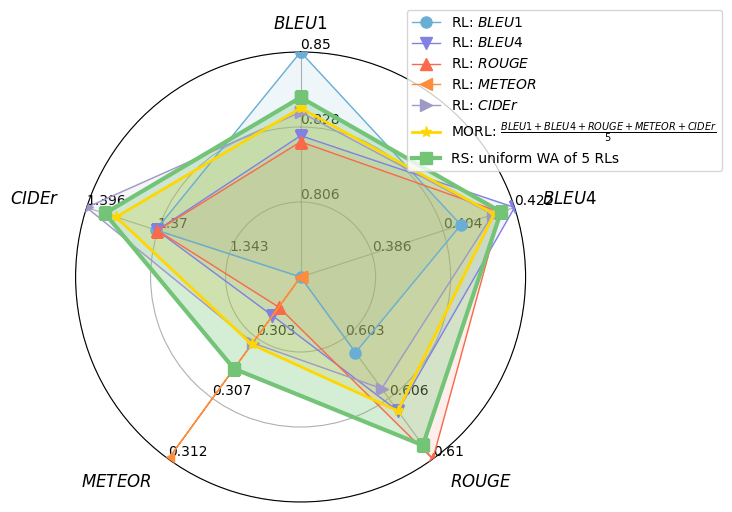

In [27]:
import pandas as pd

ranges = list_minmax

clean_labels = []
result = pd.DataFrame.from_records(
    data, columns=[dict_clean_labels.get(label, label) for label in labels]
)

variables = result.columns

fig1 = plt.figure(figsize=(5, 5))
radar = ComplexRadar(fig1, variables, ranges, show_scales=True, n_ring_levels=4)

for g in result.index:
    is_main = (g == (len(keys) - 1))
    is_second = (g == (len(keys) - 2))
    radar.plot(
        result.loc[g].values,
        label=line_labels[g],
        color=colors[g],
        marker=markers[g],
        markersize=8,
        linewidth=3 if is_main else (2 if is_second else 1)
    )
    radar.fill(result.loc[g].values, alpha=0.3 if is_main else (0.2 if is_second else 0.1), color=colors[g])

# radar.set_title("Radar chart solution with different scalexs")
radar.use_legend(loc='lower left', bbox_to_anchor=(0.72, 0.72), fontsize="medium")
plt.show()


In [28]:
import os
def save_fig(fig, name):
    assert name.endswith("pdf")
    fig.savefig(name, format="pdf", dpi=600, bbox_inches='tight')
